### 1. 视频读取接口

In [9]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

def classification_with_vedio(model, image_size, video_name_or_link, decode):
    
    cap = cv2.VideoCapture(video_name_or_link)
    
    if(cap.isOpened() == False):
        print ("Failed to open " + video_name_or_link)
        return
    
    while True:
        # get fram
        ret, frame = cap.read()
        
        # check if the video is over
        if(ret != True):
            print ("Ending!")
            break
        
        # resize fram
        img_for_model = cv2.resize(frame, image_size)
        
        # change shape
        img_for_model= np.expand_dims(img_for_model,axis=0)
        
        # model predict
        start = time.time()
        preds = model.predict(img_for_model)
        end = time.time()
        # add text
        text = 'Predicted:' + decode(preds, top=1)[0][0][1] + ' time:' + str(end-start)
        print(text)
        # show frame
        #cv2.putText(frame, text, (100, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
        #cv2.imshow('image', frame)
        #cv2.moveWindow('image', 0, 0)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

### 2. 模型搭建接口

In [2]:
from keras.applications import resnet50,xception
from keras.layers import Input,Lambda

resNet_input_shape = (299,299,3)
res_x = Input(shape=resNet_input_shape)
res_x = Lambda(xception.preprocess_input)(res_x)
res_model = xception.Xception(include_top=True, weights='imagenet', input_tensor=res_x)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


###  3. 视频帧分类

Predicted:macaque time:0.08891034126281738


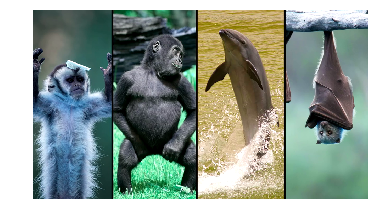

Predicted:macaque time:0.0754539966583252


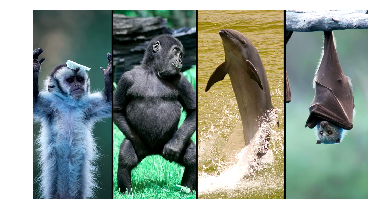

Predicted:macaque time:0.08324050903320312


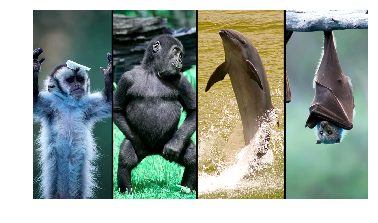

Predicted:chimpanzee time:0.07819652557373047


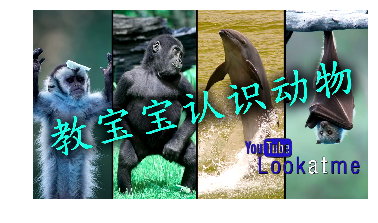

Predicted:chimpanzee time:0.08207559585571289


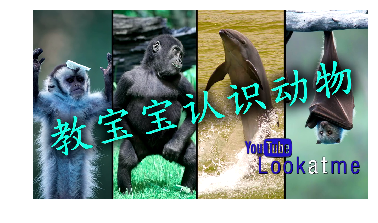

Predicted:chimpanzee time:0.08215999603271484


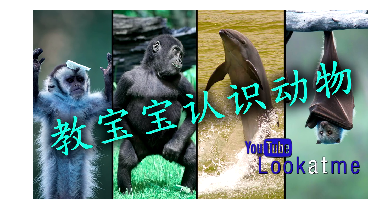

Predicted:chimpanzee time:0.08115768432617188


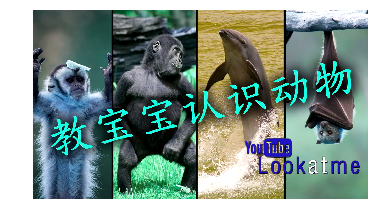

Predicted:chimpanzee time:0.06735014915466309


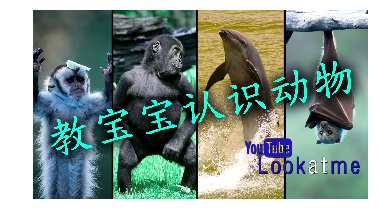

Predicted:chimpanzee time:0.07494330406188965


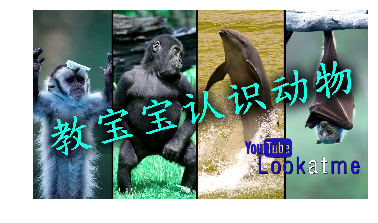

Predicted:chimpanzee time:0.07930898666381836


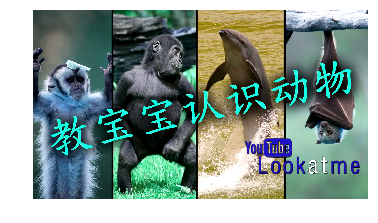

Predicted:chimpanzee time:0.07853055000305176


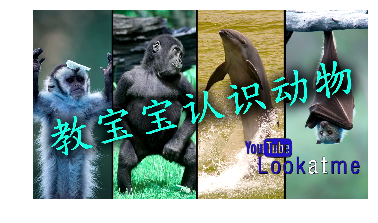

Predicted:chimpanzee time:0.07730817794799805


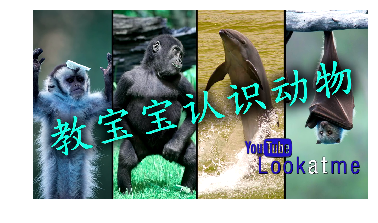

Predicted:chimpanzee time:0.08434176445007324


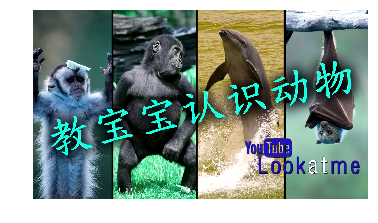

Predicted:chimpanzee time:0.0839073657989502


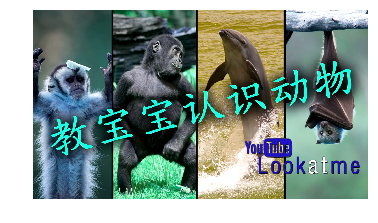

Predicted:chimpanzee time:0.09042072296142578


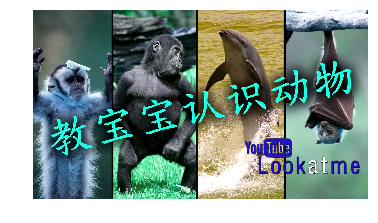

Predicted:chimpanzee time:0.07778096199035645


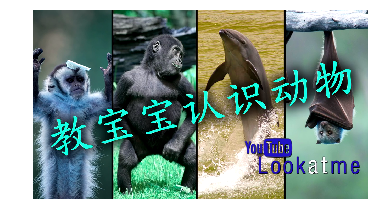

Predicted:chimpanzee time:0.08559656143188477


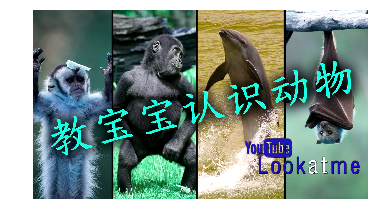

Predicted:chimpanzee time:0.08956050872802734


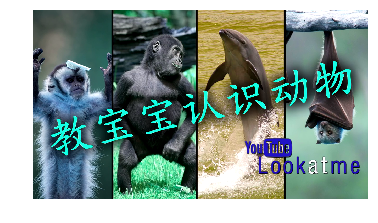

Predicted:chimpanzee time:0.08548140525817871


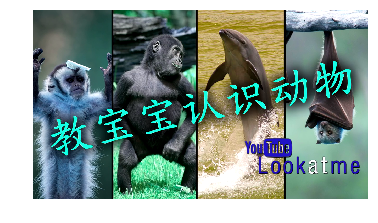

Predicted:chimpanzee time:0.08830475807189941


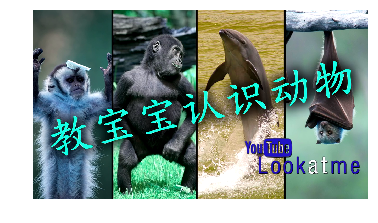

Predicted:chimpanzee time:0.08768892288208008


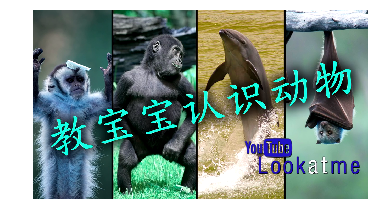

Predicted:chimpanzee time:0.042212486267089844


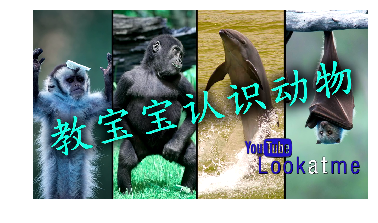

Predicted:chimpanzee time:0.08458995819091797


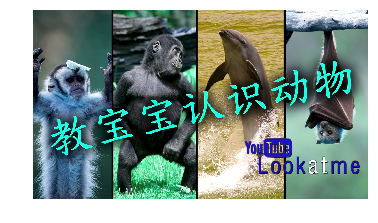

Predicted:chimpanzee time:0.0798349380493164


In [ ]:
classification_with_vedio(res_model, (299, 299), './animal.mp4', resnet50.decode_predictions)

In [8]:
from keras.applications import mobilenet

x = Input(shape=(224,224,3))
x = Lambda(mobilenet.preprocess_input)(x)

mb_model = mobilenet.MobileNet(input_shape=(224,224,3),  input_tensor=x)

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
classification_with_vedio(mb_model, (224, 224), './animal.mp4', mobilenet.decode_predictions)

Predicted:siamang time:0.5249371528625488
Predicted:siamang time:0.013087749481201172
Predicted:siamang time:0.012360572814941406
Predicted:jay time:0.012420177459716797
Predicted:jay time:0.012129783630371094
Predicted:Norwegian_elkhound time:0.012706279754638672
Predicted:jay time:0.012633562088012695
Predicted:jay time:0.012389421463012695
Predicted:jay time:0.012502193450927734
Predicted:Norwegian_elkhound time:0.012378454208374023
Predicted:Norwegian_elkhound time:0.012598514556884766
Predicted:Norwegian_elkhound time:0.012950658798217773
Predicted:Norwegian_elkhound time:0.01236724853515625
Predicted:Norwegian_elkhound time:0.014753580093383789
Predicted:Norwegian_elkhound time:0.012197017669677734
Predicted:jay time:0.011804342269897461
Predicted:jay time:0.01197195053100586
Predicted:jay time:0.012326717376708984
Predicted:jay time:0.012286663055419922
Predicted:jay time:0.012151956558227539
Predicted:jay time:0.012035608291625977
Predicted:jay time:0.011894702911376953
Predict

Predicted:Arabian_camel time:0.013827323913574219
Predicted:Arabian_camel time:0.011842489242553711
Predicted:Arabian_camel time:0.01254892349243164
Predicted:Arabian_camel time:0.012506484985351562
Predicted:Arabian_camel time:0.011983633041381836
Predicted:Arabian_camel time:0.012224435806274414
Predicted:Arabian_camel time:0.012228012084960938
Predicted:Arabian_camel time:0.012251853942871094
Predicted:Arabian_camel time:0.012548685073852539
Predicted:Arabian_camel time:0.012074470520019531
Predicted:Arabian_camel time:0.012039661407470703
Predicted:Arabian_camel time:0.011895418167114258
Predicted:Arabian_camel time:0.012210607528686523
Predicted:Arabian_camel time:0.011979818344116211
Predicted:Arabian_camel time:0.012224197387695312
Predicted:Arabian_camel time:0.01211094856262207
Predicted:Arabian_camel time:0.012668132781982422
Predicted:Arabian_camel time:0.012132883071899414
Predicted:Arabian_camel time:0.011937379837036133
Predicted:Arabian_camel time:0.012635946273803711
Pr

Predicted:ram time:0.011690378189086914
Predicted:ram time:0.011895895004272461
Predicted:ram time:0.012560129165649414
Predicted:ram time:0.012038230895996094
Predicted:ram time:0.012882232666015625
Predicted:ram time:0.012443304061889648
Predicted:ram time:0.0120849609375
Predicted:ram time:0.01180410385131836
Predicted:ram time:0.012341499328613281
Predicted:ram time:0.012464523315429688
Predicted:ram time:0.012714385986328125
Predicted:ram time:0.012424230575561523
Predicted:ram time:0.012327194213867188
Predicted:ram time:0.01196908950805664
Predicted:ram time:0.011916160583496094
Predicted:ram time:0.011861324310302734
Predicted:ram time:0.011786937713623047
Predicted:ram time:0.012225627899169922
Predicted:ram time:0.012158393859863281
Predicted:ram time:0.012082576751708984
Predicted:ram time:0.012066125869750977
Predicted:ram time:0.012132644653320312
Predicted:ram time:0.012264728546142578
Predicted:ram time:0.012048006057739258
Predicted:ram time:0.011907577514648438
Predict

Predicted:Pomeranian time:0.013183355331420898
Predicted:Pomeranian time:0.012326717376708984
Predicted:Pomeranian time:0.012703895568847656
Predicted:Pomeranian time:0.012270450592041016
Predicted:Pomeranian time:0.012175559997558594
Predicted:Pomeranian time:0.012387514114379883
Predicted:Pomeranian time:0.012190580368041992
Predicted:Pomeranian time:0.012221813201904297
Predicted:Pomeranian time:0.012228250503540039
Predicted:Pomeranian time:0.012611150741577148
Predicted:Pomeranian time:0.013226509094238281
Predicted:Pomeranian time:0.013206720352172852
Predicted:Pomeranian time:0.012749433517456055
Predicted:Pomeranian time:0.013927221298217773
Predicted:Pomeranian time:0.012779712677001953
Predicted:Pomeranian time:0.012546300888061523
Predicted:Pomeranian time:0.012693166732788086
Predicted:Pomeranian time:0.012713193893432617
Predicted:Pomeranian time:0.012836456298828125
Predicted:Pomeranian time:0.01330256462097168
Predicted:Pomeranian time:0.013096094131469727
Predicted:Pome

Predicted:gorilla time:0.012156963348388672
Predicted:gorilla time:0.011725187301635742
Predicted:gorilla time:0.012676239013671875
Predicted:gorilla time:0.012348175048828125
Predicted:gorilla time:0.012411117553710938
Predicted:gorilla time:0.012493371963500977
Predicted:gorilla time:0.012701749801635742
Predicted:gorilla time:0.012507438659667969
Predicted:gorilla time:0.012421131134033203
Predicted:gorilla time:0.012611865997314453
Predicted:gorilla time:0.012323379516601562
Predicted:gorilla time:0.013128280639648438
Predicted:gorilla time:0.01405477523803711
Predicted:gorilla time:0.01299428939819336
Predicted:gorilla time:0.012825250625610352
Predicted:gorilla time:0.012260675430297852
Predicted:gorilla time:0.012102365493774414
Predicted:gorilla time:0.011923074722290039
Predicted:gorilla time:0.01318979263305664
Predicted:gorilla time:0.011938810348510742
Predicted:gorilla time:0.012620210647583008
Predicted:gorilla time:0.012051820755004883
Predicted:gorilla time:0.0122394561

Predicted:Indian_elephant time:0.013561248779296875
Predicted:Indian_elephant time:0.013088703155517578
Predicted:Indian_elephant time:0.012905597686767578
Predicted:Indian_elephant time:0.012454986572265625
Predicted:Indian_elephant time:0.012631893157958984
Predicted:Indian_elephant time:0.013053178787231445
Predicted:Indian_elephant time:0.012630701065063477
Predicted:Indian_elephant time:0.013213872909545898
Predicted:Indian_elephant time:0.012864112854003906
Predicted:Indian_elephant time:0.013434886932373047
Predicted:Indian_elephant time:0.012180805206298828
Predicted:Indian_elephant time:0.012348651885986328
Predicted:Indian_elephant time:0.012377262115478516
Predicted:Indian_elephant time:0.011915445327758789
Predicted:Indian_elephant time:0.012337446212768555
Predicted:Indian_elephant time:0.012469768524169922
Predicted:Indian_elephant time:0.011998891830444336
Predicted:Indian_elephant time:0.012390613555908203
Predicted:Indian_elephant time:0.01316213607788086
Predicted:Ind

Predicted:sorrel time:0.013172149658203125
Predicted:sorrel time:0.013453006744384766
Predicted:sorrel time:0.012243986129760742
Predicted:sorrel time:0.01324462890625
Predicted:sorrel time:0.012828350067138672
Predicted:sorrel time:0.012250423431396484
Predicted:sorrel time:0.012510538101196289
Predicted:sorrel time:0.012383699417114258
Predicted:sorrel time:0.011859655380249023
Predicted:sorrel time:0.013883113861083984
Predicted:sorrel time:0.012941122055053711
Predicted:sorrel time:0.012537240982055664
Predicted:sorrel time:0.012603521347045898
Predicted:sorrel time:0.01297760009765625
Predicted:sorrel time:0.012670278549194336
Predicted:sorrel time:0.01297903060913086
Predicted:sorrel time:0.012923479080200195
Predicted:sorrel time:0.012548446655273438
Predicted:sorrel time:0.01272892951965332
Predicted:sorrel time:0.012424230575561523
Predicted:sorrel time:0.012601375579833984
Predicted:sorrel time:0.012151956558227539
Predicted:sorrel time:0.012792348861694336
Predicted:sorrel t

Predicted:Madagascar_cat time:0.013492822647094727
Predicted:Madagascar_cat time:0.012843132019042969
Predicted:Madagascar_cat time:0.011964559555053711
Predicted:Madagascar_cat time:0.012232303619384766
Predicted:Madagascar_cat time:0.013129472732543945
Predicted:Madagascar_cat time:0.012312889099121094
Predicted:Madagascar_cat time:0.012112855911254883
Predicted:Madagascar_cat time:0.01248931884765625
Predicted:Madagascar_cat time:0.012871980667114258
Predicted:Madagascar_cat time:0.012651681900024414
Predicted:peacock time:0.012041568756103516
Predicted:peacock time:0.0126800537109375
Predicted:peacock time:0.012392520904541016
Predicted:peacock time:0.013324499130249023
Predicted:peacock time:0.012660980224609375
Predicted:peacock time:0.012526988983154297
Predicted:peacock time:0.011996746063232422
Predicted:peacock time:0.01266026496887207
Predicted:peacock time:0.012677907943725586
Predicted:peacock time:0.013238668441772461
Predicted:peacock time:0.012161731719970703
Predicted:

Predicted:hippopotamus time:0.012226343154907227
Predicted:hippopotamus time:0.01200246810913086
Predicted:hippopotamus time:0.012146472930908203
Predicted:hippopotamus time:0.012239217758178711
Predicted:hippopotamus time:0.012193918228149414
Predicted:hippopotamus time:0.011925697326660156
Predicted:hippopotamus time:0.012204647064208984
Predicted:hippopotamus time:0.012579679489135742
Predicted:hippopotamus time:0.012289285659790039
Predicted:hippopotamus time:0.012693405151367188
Predicted:hippopotamus time:0.012531518936157227
Predicted:hippopotamus time:0.012192964553833008
Predicted:hippopotamus time:0.012643098831176758
Predicted:hippopotamus time:0.012346744537353516
Predicted:hippopotamus time:0.012471437454223633
Predicted:hippopotamus time:0.012357473373413086
Predicted:hippopotamus time:0.012423992156982422
Predicted:hippopotamus time:0.011972665786743164
Predicted:hippopotamus time:0.012343645095825195
Predicted:hippopotamus time:0.01247715950012207
Predicted:hippopotamus

Predicted:drake time:0.012518882751464844
Predicted:drake time:0.012146711349487305
Predicted:drake time:0.012184381484985352
Predicted:drake time:0.012499332427978516
Predicted:drake time:0.012934684753417969
Predicted:drake time:0.012398719787597656
Predicted:drake time:0.012390851974487305
Predicted:drake time:0.01192617416381836
Predicted:drake time:0.012990951538085938
Predicted:drake time:0.012347221374511719
Predicted:drake time:0.012010812759399414
Predicted:drake time:0.012289285659790039
Predicted:drake time:0.012298583984375
Predicted:drake time:0.012448787689208984
Predicted:drake time:0.013625860214233398
Predicted:drake time:0.012112140655517578
Predicted:drake time:0.012129783630371094
Predicted:drake time:0.013159513473510742
Predicted:drake time:0.012149333953857422
Predicted:drake time:0.01215362548828125
Predicted:drake time:0.012849092483520508
Predicted:drake time:0.01241445541381836
Predicted:drake time:0.012425899505615234
Predicted:drake time:0.01228713989257812